<a href="https://colab.research.google.com/github/vy-phung/personal-project/blob/main/Predicted_and_classified_genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction and Classification from fetal and adult genes 

## Objectives

To identify if we can predict and classify the ages, age_group (fetus or adult), and genders of samples based on the different number of genes from 3 different tables sections: 
1. The transformed gene from initial count table (having 15559 genes)
2. The up-down regulated genes (having 5566 genes)
3. The 2 most up-down regulated genes (having 2 genes)

-   Firstly, I will classify age_group (fetus or adult) of samples and classify gender by using Logistic regression; and then predicting age which is continuous data by using Multi linear regression, Ridge Regression with the support of Grid alpha search, and Random Forest Regressor for 10 samples
-   Secondly, I will do the same analysis to 4 new samples which have not been analyzed the correlation in R by extracting same genes'names from 3 tables sections above. 

<h1>Table of content</h1>
<ul>
    <li><a href="#ref1">Part 1: Algorithm </a></li>
    <li><a href="#ref2">Part 2: Analyzing 10 samples of transformed genes from initial count table </a></li>
    <li><a href="#ref3">Part 3: Analyzing 10 samples of up-down regulated genes which have already been analyzed and have p-adjusted value < 0.05 </a></li>
    <li><a href="#ref4">Part 4: Analyzing 10 samples of 2 genes including the most up-regulation and the most down-regulation</a></li>
    <li><a href="#ref4">Part 5: Testing 4 new samples</a></li>
</ul>


<h2>Part 1: Algorithm to predict and plot data</h2>

In [ ]:
#@title Import packages 
# Package
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
# import the visualization package
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
#@title Distribution Plot
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('age')
    plt.ylabel('Proportion of samples')

    plt.show()
    plt.close()

In [ ]:
#@title Logistic regression & Multi linear regression
class Prediction:
  def __init__(self,x,y,lr):
    self.x = x
    self.y = y
    self.lr = lr
  def train_test(self):
      # lr is regressor used to predict or classify 
    x_train, x_test, y_train, y_test = train_test_split(self.x, self.y, test_size=0.20, random_state=0)
    self.lr.fit(x_train,y_train)
    self.x_test = x_test
    self.x_train = x_train
    self.y_test = y_test
    self.y_train = y_train
  def predict(self,x,y): 
    self.train_test() 
    if str(x.values) == str(self.x.values) and str(y.values) == str(self.y.values):
      x = self.x_test
      y = self.y_test
      print("number of test samples :", self.x_test.shape[0])
      print("number of training samples:",self.x_train.shape[0])
    print("actual data: ",y.values)
    print("predicted data: ",self.lr.predict(x)) 
  def cnf(self,x,y):
    if y.iloc[:,0].dtype == 'O': # logistic regression for binary variable
      self.train_test()
      if str(x.values) == str(self.x.values) and str(y.values) == str(self.y.values):
        self.x == x
        self.y == y 
      print("confusion matrix:",metrics.confusion_matrix(y, self.lr.predict(x)))
      print("Accuracy of 10 samples:",metrics.accuracy_score(y, self.lr.predict(x)))
      print("Precision of 10 samples:",metrics.precision_score(y, self.lr.predict(x), average="binary", pos_label="1")) # pos_label: positive value
  def score(self,x,y):
    if y.iloc[:,0].dtype == 'float64': # regression for continuous data 
      self.train_test()
      if str(x.values) == str(self.x.values) and str(y.values) == str(self.y.values):
        print('The R-square of testing data: ', self.lr.score(self.x_test, self.y_test))
        print('The R-square of training data: ', self.lr.score(self.x_train, self.y_train))
        print('The mean square error of actual and predicted fitting data is: ', \
          mean_squared_error(self.y, self.lr.predict(self.x)))
        Title = 'Distribution  Plot of  Predicted Value Using Training Data'
        DistributionPlot(self.y_train, self.lr.predict(self.x_train), "Actual Values (Train)", "Predicted Values (Train)", Title)
        Title = 'Distribution  Plot of  Predicted Value Using Testing Data'
        DistributionPlot(self.y_test, self.lr.predict(self.x_test), "Actual Values (Test)", "Predicted Values (Test)", Title)
        return
      print('The R-square: ', self.lr.score(x, y))
  def test(self,x2,y2):
    self.predict(x2,y2)
    self.cnf(x2,y2)
    self.score(x2,y2)
    return

In [ ]:
#@title Ridge regression and Grid Search
class other_prediction:
  def __init__(self,x,y,parameters):
    self.x = x
    self.y = y
    self.parameters = parameters
  def train_test(self):
      # lr is regressor used to predict or classify 
    x_train, x_test, y_train, y_test = train_test_split(self.x, self.y, test_size=0.20, random_state=0)
    RR=Ridge()
    self.Grid = GridSearchCV(RR, self.parameters,cv=4)
    self.x_test = x_test
    self.x_train = x_train
    self.y_test = y_test
    self.y_train = y_train
  def Ridge(self,x,y):
    if y.iloc[:,0].dtype == 'float64' and x.shape[1] > 10:
      self.train_test()
      self.Grid.fit(self.x, self.y)
      BestRR=self.Grid.best_estimator_
      RigeModel=Ridge(alpha=BestRR.alpha)
      RigeModel.fit(self.x, self.y)
      print(BestRR)
      if str(x.values) == str(self.x.values) and str(y.values) == str(self.y.values):
        x = self.x_test
        y = self.y_test
      print("R^2 of data:",RigeModel.score(x, y))
      print("predict data:",RigeModel.predict(x))
      print("actual testing data:",y.values)
  def Ridge_Poly(self,x,y,order):
    if x.shape[1] <= 10 and y.iloc[:,0].dtype == 'float64':
      self.train_test()
      pr_score = {}
      yhat_test = {}
      ri_score = {}
      alpha = {}
      y_pred_test = {}
      for n in order:
        pr = PolynomialFeatures(degree=n)
        x_train_pr = pr.fit_transform(self.x_train)
        poly = LinearRegression()
        poly.fit(x_train_pr, self.y_train) 
        if str(x) == str(self.x) and (str(y) == str(self.y)):
          x = self.x_test
          y = self.y_test
        x_pr = pr.fit_transform(x)
        pr_score[n] = poly.score(x_pr, y)
        yhat_test[n] = poly.predict(x_pr)
          # Ridge and Grid
        self.Grid.fit(x_train_pr, self.y_train)
        BestRR=self.Grid.best_estimator_
        RigeModel=Ridge(alpha=BestRR.alpha)
        RigeModel.fit(x_train_pr, self.y_train)
        ri_score[n] = RigeModel.score(x_pr, y)
        y_pred_test[n] = RigeModel.predict(x_pr)
        alpha[n] = BestRR
      values_pr = list(pr_score.values())
      values_ri = list(ri_score.values())
      if max(values_pr) < max(values_ri):
        degree = list(ri_score.keys())[values_ri.index(max(values_ri))]
      else:
        degree = list(pr_score.keys())[values_pr.index(max(values_pr))]
      print("Suitable degree for polynomial is: ",degree)
      print(alpha[degree])
      print("R^2 of test data using polynomial:", pr_score[degree])
      print("R^2 of test data using Ridge:",ri_score[degree])
      print("Predicted testing data using polynomial:", yhat_test[degree])  
      print("Predicted testing data using Ridge:", y_pred_test[degree]) 
      print("actual testing data: ",y.values)
  def test(self,x2,y2,order):
    self.Ridge(x2,y2)
    self.Ridge_Poly(x2,y2,order)
    return

<h2>Part 2: 10 samples of initial count table's transformed genes</h2>

#### <b>Data processing<b/>

In [ ]:
edata = pd.read_csv("edata_tr.csv")
edata

,Unnamed: 0,SRR1554534,SRR1554535,SRR1554568,SRR1554561,SRR1554567,SRR1554536,SRR1554541,SRR1554539,SRR1554538,SRR1554537
0,A1BG,9.143633,8.583227,8.105891,9.206773,6.995598,8.762864,8.373665,8.429514,7.632873,8.489938
1,ADA,8.646385,9.145974,7.303994,8.001912,7.351627,9.770115,7.843839,8.253862,7.831596,7.197164
2,CDH2,13.562468,13.585906,14.957846,13.652418,14.829826,13.812075,14.545283,13.717079,14.708753,15.051336
3,AKT3,13.479431,13.159273,15.876052,13.925121,14.376621,12.332018,15.204848,14.383520,14.749481,15.584859
4,ZBTB11-AS1,7.746129,7.539217,7.489181,7.323988,7.706548,7.731734,7.684944,7.654166,7.625887,7.705363
...,...,...,...,...,...,...,...,...,...,...,...
15554,CDH1,9.283095,9.269662,10.242205,8.787615,10.671178,9.219568,9.003333,8.933461,9.185240,9.167789
15555,SLC12A6,13.031252,12.899341,13.801854,13.197724,13.451059,12.386146,13.613920,13.345966,13.644767,13.585326
15556,PTBP3,11.367093,11.867973,13.315986,11.766260,12.716064,11.924352,12.990262,12.386899,12.840028,12.564455
15557,DGCR2,15.038492,14.455368,13.976339,15.153004,13.996213,14.484859,13.867110,14.553994,13.960779,14.168734


In [ ]:
edata = edata.set_index("Unnamed: 0")
edata.index.names  = [None]
edata_T = edata.T
edata_T

,A1BG,ADA,CDH2,AKT3,ZBTB11-AS1,MED6,NAALAD2,DDTL,NAALADL1,NINJ2-AS1,ACOT8,ABI1,GNPDA1,MIMT1,KCNE3,ZBTB33,SNHG8,GTF2IP4,CDH3,TANK,HAVCR1P1,POM121C,ZSCAN30,MCTS2P,SRA1,UCKL1-AS1,TMEM170B,SNORD58C,ZGLP1,FAM86JP,LOC100126784,C8orf88,PLCE1-AS1,FAM229A,JAZF1-AS1,LOC100128164,TMPO-AS1,LINC02731,ZNF667-AS1,LOC100128253,...,EXOG,XYLB,OXSR1,GFPT2,CRYZL1,WDR1,AMMECR1,CDC25C,GOLGA5,HS3ST4,HS3ST2,HS3ST1,USP15,CDC27,USP3,MVP,SLC23A2,SLC23A1,THRAP3,MED12,MED13,CDC34,NR1I3,NUP153,CCS,NR1D2,RBX1,CDC42,DOP1B,THOC1,REC8,RCE1,HNRNPDL,DMTF1,PPP4R1,CDH1,SLC12A6,PTBP3,DGCR2,CASP8AP2
SRR1554534,9.143633,8.646385,13.562468,13.479431,7.746129,10.965760,10.367572,7.328231,6.963692,8.822544,11.946038,13.366491,12.071443,8.185792,7.299651,11.724310,11.040949,9.332611,10.056517,11.043564,6.306034,12.131384,11.187060,8.428487,11.774578,5.942993,12.447507,5.990280,9.813163,8.156964,11.546933,5.310318,5.012922,8.198675,8.275069,7.411890,6.364689,9.262248,11.996517,8.508692,...,10.069137,8.260353,12.261088,11.033097,11.745050,13.960913,8.851549,4.834219,11.609201,13.196758,12.322287,10.436515,11.510020,12.598076,9.241031,11.818152,14.454579,6.029861,14.044886,12.553101,12.546297,13.108467,7.783518,12.263514,11.977166,13.057045,12.213122,13.563907,12.427323,11.218925,11.567748,10.500004,15.010639,13.123384,11.748144,9.283095,13.031252,11.367093,15.038492,11.208092
SRR1554535,8.583227,9.145974,13.585906,13.159273,7.539217,10.953407,10.644661,7.691085,6.885521,9.179721,11.757942,13.758680,12.430628,6.485860,7.174165,12.137270,11.156462,9.108857,8.777516,11.573996,5.659820,11.713654,11.583213,8.646386,11.696444,6.466384,13.535621,6.264076,9.802732,7.660717,11.087468,6.394250,5.049559,7.810233,8.786065,6.888673,6.585095,9.554467,12.107183,7.520252,...,10.350487,8.431188,12.252010,11.375670,11.812673,13.572111,9.177446,5.725231,12.156370,12.959437,12.410400,9.938927,12.066043,13.211498,9.896571,11.529537,14.225245,6.335155,13.753086,12.006727,12.878277,12.702216,7.319999,12.587600,11.735796,13.893709,12.673437,14.078996,12.243227,11.659515,11.144585,10.362881,15.207310,13.417473,12.330147,9.269662,12.899341,11.867973,14.455368,11.459779
SRR1554568,8.105891,7.303994,14.957846,15.876052,7.489181,11.062971,9.091478,7.186178,6.567708,8.099645,10.652184,12.833693,12.045205,8.525005,7.401378,13.056753,10.896357,9.652456,9.948553,12.237046,6.912586,12.078191,12.612542,9.491832,12.062338,7.420499,13.577083,6.726470,10.167270,6.409820,9.171032,7.553961,6.791164,7.500049,4.925746,6.790891,8.339422,7.691874,12.001934,5.392324,...,11.014434,9.493641,13.640403,10.264169,11.568180,13.661309,10.381393,9.036064,12.096830,13.808086,9.569563,10.199837,13.293106,13.498710,12.472372,8.653635,14.039276,7.900844,14.713353,13.746716,14.387287,12.293468,7.643377,13.459464,11.521068,12.491744,11.777826,14.129060,14.284260,12.559479,13.256709,11.223629,16.253288,14.440244,14.061450,10.242205,13.801854,13.315986,13.976339,12.916206
SRR1554561,9.206773,8.001912,13.652418,13.925121,7.323988,10.825176,10.406496,7.305990,6.689252,8.340297,12.014095,13.464797,12.325439,6.562989,7.236675,11.858819,10.746418,8.524623,9.883197,10.949873,6.030009,12.425645,11.040663,8.539710,11.678305,7.618927,12.740738,5.806708,10.260433,8.057940,11.414649,5.844022,4.581718,8.199565,8.083382,7.354909,6.401091,9.734726,11.736873,8.910149,...,10.316555,9.095420,12.113526,11.062619,11.844331,13.799661,8.785126,5.243429,11.545216,12.645491,12.061151,10.549871,11.786105,12.582161,8.911123,11.170068,14.513305,6.162469,13.985093,12.670834,12.884486,13.156844,7.894102,12.546458,12.006163,13.571330,12.112764,13.609118,12.720381,10.998715,11.434048,10.645623,14.825710,13.043291,12.223982,8.787615,13.197724,11.766260,15.153004,11.188994
SRR1554567,6.995598,7.351627,14.829826,14.376621,7.706548,11.161363,10.659595,7.545062,7.167443,8.226544,10.470291,13.058067,11.799100,8.035972,7.522792,12.975194,10.914658,9.626314,10.214180,11.847383,7.252727,11.747622,12.383769,9.571803,11.834974,7.270623,13.558488,6.698271,10.177543,6.812443

In [ ]:
pheno = pd.read_csv("/content/pheno_sample.csv")
pheno

,Run,age_group,age,sex
0,SRR1554534,adult,40.4200,male
1,SRR1554535,adult,41.5800,male
2,SRR1554568,fetus,-0.4986,male
3,SRR1554561,adult,43.8800,male
4,SRR1554567,fetus,-0.4027,male
5,SRR1554536,adult,44.1700,female
6,SRR1554541,fetus,-0.3836,male
7,SRR1554539,adult,36.5000,female
8,SRR1554538,fetus,-0.4027,female
9,SRR1554537,fetus,-0.3836,female


In [ ]:
age = []
gender = []
for i in pheno.age_group:
  if i == "adult":
    age.append("1")
  elif i == "fetus":
    age.append("0")
for i in pheno.sex:
  if i == "male":
    gender.append("1")
  elif i == "female":
    gender.append("0")
fetus_adult = pd.Series(age, name='adult_fetus')
gender = pd.Series(gender, name='gender')
pheno = pd.concat([pheno,fetus_adult,gender], axis=1)
pheno = pheno.set_index("Run")
pheno.index.names = [None]
pheno

,age_group,age,sex,adult_fetus,gender
SRR1554534,adult,40.4200,male,1,1
SRR1554535,adult,41.5800,male,1,1
SRR1554568,fetus,-0.4986,male,0,1
SRR1554561,adult,43.8800,male,1,1
SRR1554567,fetus,-0.4027,male,0,1
SRR1554536,adult,44.1700,female,1,0
SRR1554541,fetus,-0.3836,male,0,1
SRR1554539,adult,36.5000,female,1,0
SRR1554538,fetus,-0.4027,female,0,0
SRR1554537,fetus,-0.3836,female,0,0


In [ ]:
x = edata_T

#### <b>Logistic regression<b/>

Classifying fetus or adult based on age_group

In [ ]:
y = pheno[["adult_fetus"]]
y

,adult_fetus
SRR1554534,1
SRR1554535,1
SRR1554568,0
SRR1554561,1
SRR1554567,0
SRR1554536,1
SRR1554541,0
SRR1554539,1
SRR1554538,0
SRR1554537,0


In [ ]:
lr = LogisticRegression()
p = Prediction(x,y,lr)
p.predict(x,y)
p.cnf(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number of test samples : 2
number of training samples: 8
actual data:  [['0']
 ['0']]
predicted data:  ['0' '0']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


confusion matrix: [[5 0]
 [0 5]]
Accuracy of 10 samples: 1.0
Precision of 10 samples: 1.0


Classifying gender of samples

In [ ]:
y_gender = pheno[["gender"]]
y_gender

,gender
SRR1554534,1
SRR1554535,1
SRR1554568,1
SRR1554561,1
SRR1554567,1
SRR1554536,0
SRR1554541,1
SRR1554539,0
SRR1554538,0
SRR1554537,0


In [ ]:
p = Prediction(x,y_gender,lr)
p.predict(x,y_gender)
p.cnf(x,y_gender)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number of test samples : 2
number of training samples: 8
actual data:  [['1']
 ['0']]
predicted data:  ['0' '0']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


confusion matrix: [[4 0]
 [1 5]]
Accuracy of 10 samples: 0.9
Precision of 10 samples: 1.0


According to statistical analysis before that there is no correlation between gender and gene expression. Therefore the prediction based on expressed genes to classify gender is incorrect. In order to see clearly, all x is used for predicted function below. 

#### <b>Predicting age (continuous data)<b/>

In [ ]:
y_age = pheno[["age"]]
y_age

,age
SRR1554534,40.4200
SRR1554535,41.5800
SRR1554568,-0.4986
SRR1554561,43.8800
SRR1554567,-0.4027
SRR1554536,44.1700
SRR1554541,-0.3836
SRR1554539,36.5000
SRR1554538,-0.4027
SRR1554537,-0.3836


Multi linear regression

number of test samples : 2
number of training samples: 8
actual data:  [[-0.4986]
 [-0.4027]]
predicted data:  [[-3.38719242]
 [-1.75369115]]
The R-square of testing data:  -2210.4501135869386
The R-square of training data:  1.0
The mean square error of actual and predicted fitting data is:  1.0169143259568714


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


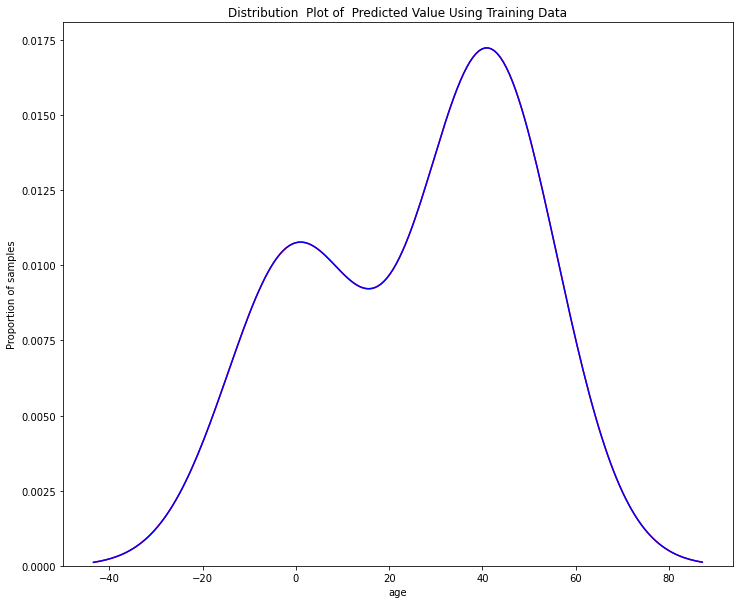

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


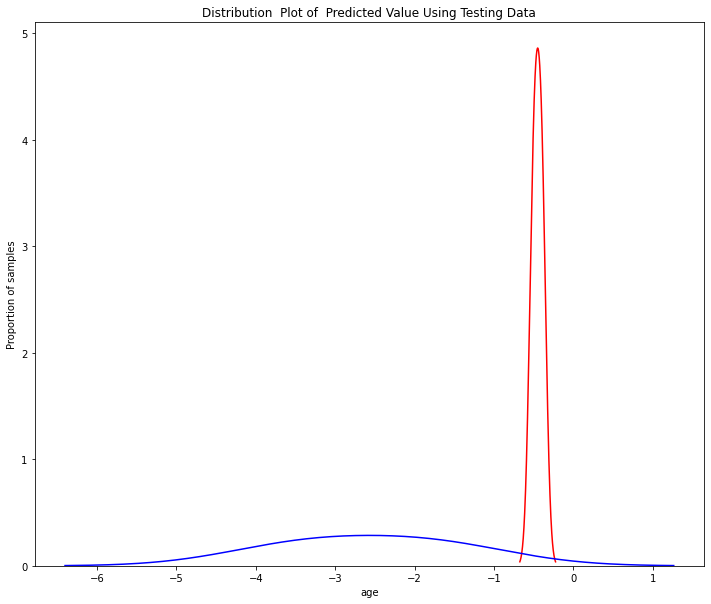

In [ ]:
lr = LinearRegression()
p = Prediction(x,y_age,lr)
p.predict(x,y_age)
p.score(x,y_age)

We can see that R^2 of testing data is negative, which means that it is overfitting

Using grid search to find suitable alpha for ridge model

In [ ]:
parameters= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
o = other_prediction(x,y_age,parameters)
o.Ridge(x,y_age)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
R^2 of data: -31.726080041146417
predict data: [[-0.88566156]
 [-0.428606  ]]
actual testing data: [[-0.4986]
 [-0.4027]]


<h2>Part 3: Up-down regulated genes of 10 samples</h2>

#### <b>Data processing<b/>

In [ ]:
up_down = pd.read_csv("data for regulated gene.csv")
up_down

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,SRR1554534,SRR1554535,SRR1554568,SRR1554561,SRR1554567,SRR1554536,SRR1554541,SRR1554539,SRR1554538,SRR1554537
0,A2M,13185.383185,-1.670680,0.420489,-3.973179,7.091974e-05,1.717291e-04,13.657416,13.795969,12.584194,13.003245,12.597035,15.235020,12.938130,13.881265,12.930901,12.535831
1,A2ML1,484.632776,-2.748295,0.569283,-4.827644,1.381576e-06,4.322248e-06,8.848175,9.062477,6.909735,8.644313,7.457088,10.622862,6.885452,7.708383,7.500564,7.351208
2,A4GALT,412.311453,-2.790862,0.571964,-4.879432,1.063917e-06,3.379052e-06,8.868851,8.344972,6.895125,8.568670,6.710507,10.362960,7.260562,7.533763,7.292369,6.723675
3,AARD,124.885643,-2.105662,0.537200,-3.919699,8.865947e-05,2.115377e-04,7.347104,7.314591,5.402734,6.636227,6.395016,7.306073,6.484457,7.470666,5.264764,5.737391
4,AARS1,33645.649283,-1.564934,0.270913,-5.776517,7.626273e-09,3.150984e-08,15.757594,15.345289,14.133470,15.908997,14.037013,14.566318,14.312565,15.532491,14.157486,14.182287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5561,ZWILCH,2469.451801,2.212490,0.366351,6.039259,1.548240e-09,6.965252e-09,9.203633,10.563658,11.688186,9.646344,11.741266,9.119705,12.014128,10.472781,11.676821,11.858405
5562,ZWINT,1431.031577,2.470592,0.456833,5.408086,6.370174e-08,2.350018e-07,9.158430,9.266755,11.768482,8.770140,10.929261,8.653688,9.032225,8.943709,11.047248,11.014847
5563,ZXDA,1338.880407,1.446283,0.201328,7.183722,6.783895e-13,4.459430e-12,9.298298,9.408328,10.695708,9.704292,10.691396,9.581422,10.874795,9.996956,10.778896,10.978820
5564,ZXDC,14083.362352,1.596761,0.129687,12.312466,7.761457e-35,3.260866e-33,12.904692,12.734604,14.242381,12.935801,14.026589,12.953526,14.199765,12.951150,14.424315,14.336139


In [ ]:
select = ["Unnamed: 0","SRR1554534",	"SRR1554535",	"SRR1554568",	"SRR1554561",	"SRR1554567",	"SRR1554536",	"SRR1554541",	"SRR1554539",	"SRR1554538",	"SRR1554537"]
up_down1 = up_down[select]
up_down1 = up_down1.set_index("Unnamed: 0")
up_down1.index.names = [None]
up_down_T = up_down1.T
up_down_T

,A2M,A2ML1,A4GALT,AARD,AARS1,AATK,ABAT,ABCA1,ABCA10,ABCA12,ABCA2,ABCA6,ABCA7,ABCA8,ABCA9,ABCB1,ABCC12,ABCC4,ABCC8,ABCG2,ABCG4,ABHD11,ABHD12,ABHD12B,ABHD14A,ABHD14B,ABHD15,ABHD16B,ABHD17A,ABHD18,ABHD8,ABI3BP,ABL2,ABLIM2,ABR,ABRACL,ABRAXAS1,ABTB1,ACACB,ACADS,...,ZNF829,ZNF83,ZNF831,ZNF836,ZNF84,ZNF841,ZNF844,ZNF845,ZNF85,ZNF850,ZNF852,ZNF860,ZNF878,ZNF879,ZNF880,ZNF883,ZNF90,ZNF91,ZNF92,ZNF93,ZNRF1,ZNRF2,ZRANB2-AS1,ZSCAN12,ZSCAN16,ZSCAN2,ZSCAN20,ZSCAN21,ZSCAN23,ZSCAN26,ZSCAN30,ZSCAN9,ZSWIM4,ZSWIM5,ZSWIM6,ZWILCH,ZWINT,ZXDA,ZXDC,ZZZ3
SRR1554534,13.657416,8.848175,8.868851,7.347104,15.757594,15.412314,15.773004,10.728758,8.459024,6.127944,16.924871,6.642122,11.876442,11.226060,10.146097,11.725727,9.959768,8.642513,13.262715,12.156003,12.361851,10.660498,14.027339,8.701414,11.986268,10.572723,9.056314,9.861490,12.058016,9.233208,14.098318,7.519580,12.477906,14.127248,16.562266,10.143301,8.544178,13.551022,12.606489,10.299273,...,9.361568,11.656330,8.638472,9.162450,6.948577,10.958141,8.671796,8.854454,7.266704,7.256993,7.701330,7.134040,5.523122,8.388920,9.117129,9.318429,5.447482,10.384837,9.385131,7.455699,13.007817,9.953358,5.873261,9.956498,8.342552,10.050968,8.445623,9.713292,7.658145,11.056144,11.187060,9.657207,11.358897,10.997099,12.237565,9.203633,9.158430,9.298298,12.904692,11.142157
SRR1554535,13.795969,9.062477,8.344972,7.314591,15.345289,15.065392,15.345071,11.097286,8.806715,6.304167,16.764446,7.367755,11.504536,12.397963,10.500113,11.504491,9.713523,9.107198,12.773792,12.353510,11.955876,10.431284,13.922281,8.933736,11.841070,10.369419,9.143898,9.390017,11.550377,9.317387,13.556946,8.419397,12.318609,13.426870,16.039723,10.826507,9.050662,13.276132,11.843885,10.275955,...,9.371152,12.292076,7.858841,9.165177,7.078620,11.066317,9.313838,9.245559,8.198783,7.855481,7.607156,6.885632,6.584933,9.262461,9.203113,9.805414,6.036277,11.065840,10.845381,7.943450,12.606994,10.172354,7.158877,10.243413,8.677554,9.795162,8.263585,9.464862,7.331028,11.578808,11.583213,9.615276,10.480033,10.825541,12.483370,10.563658,9.266755,9.408328,12.734604,11.893657
SRR1554568,12.584194,6.909735,6.895125,5.402734,14.133470,11.532492,14.755580,13.191035,6.858484,7.621509,14.372198,6.097790,11.133889,8.692355,9.506912,9.500953,5.277975,10.846871,10.464994,10.012782,10.405635,9.161784,11.737641,3.264354,10.270335,9.561828,7.882171,8.783332,9.927939,10.521080,11.857025,9.691310,13.387431,10.465655,15.238726,12.014159,9.977788,11.931049,10.941669,8.909448,...,10.969787,13.693378,3.172974,11.605037,8.457333,12.753678,11.249995,11.190910,10.281550,9.786821,10.370039,9.682878,7.839871,10.127181,11.089222,11.054856,8.839597,13.197695,12.082913,10.808293,14.001511,11.231796,8.347241,12.090830,10.170591,12.288275,9.769823,10.585639,10.375166,12.529951,12.612542,11.566507,12.185891,13.014882,13.548023,11.688186,11.768482,10.695708,14.242381,12.719315
SRR1554561,13.003245,8.644313,8.568670,6.636227,15.908997,15.465764,15.899338,10.717510,8.575097,5.908803,16.784595,6.879113,12.057728,11.010436,10.494653,11.084899,10.092062,8.077065,13.661388,11.516742,12.396533,10.475263,13.848728,8.642972,11.968709,10.327511,8.692463,9.800060,12.277649,9.003095,14.280003,7.843736,12.702621,14.271265,16.907170,10.242545,8.426179,13.755013,12.134428,10.050875,...,9.346246,11.437299,9.405653,9.549900,6.928008,10.941166,8.483845,8.509000,6.692054,7.470648,8.373986,7.427324,5.708142,8.073806,9.156198,9.659393,5.726660,10.788137,9.020034,7.214739,12.989843,10.252754,6.447057,9.869246,7.923305,9.945018,9.097662,9.199770,8.230564,11.173858,11.040663,9.007093,11.489777,10.879565,12.278762,9.646344,8.770140,9.704292,12.935801,11.499921
SRR1554567,12.597035,7.457088,6.710507,6.395016,14.037013,11.828298,14.695775,12.993483,7.561909,7.299447,14.174753,6.097308,9.223357,10.005713,9.447863,9.724329,7.269236,10.216889,11.079017,10.814944,10.334022,9.238554,12.053859,4.516572,10.446782,9.577568,7.492575,8.560335,9.900396,10.267065,11.787334,10.041557,13.502438,10.731063,15.325546,11.55971

In [ ]:
x1 = up_down_T

#### <b>Logistic regression<b/>

Classifying fetus or adult based on age_group

In [ ]:
lr = LogisticRegression()
p = Prediction(x1,y,lr)
p.predict(x1,y)
p.cnf(x1,y)

number of test samples : 2
number of training samples: 8
actual data:  [['0']
 ['0']]
predicted data:  ['0' '0']
confusion matrix: [[5 0]
 [0 5]]
Accuracy of 10 samples: 1.0
Precision of 10 samples: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classifying gender of samples

In [ ]:
p = Prediction(x1,y_gender,lr)
p.predict(x1,y_gender)
p.cnf(x1,y_gender)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number of test samples : 2
number of training samples: 8
actual data:  [['1']
 ['0']]
predicted data:  ['0' '1']
confusion matrix: [[3 1]
 [1 5]]
Accuracy of 10 samples: 0.8
Precision of 10 samples: 0.8333333333333334


#### <b>Predicting age (continuous data)<b/>

Multi linear regression

number of test samples : 2
number of training samples: 8
actual data:  [[-0.4986]
 [-0.4027]]
predicted data:  [[-3.63986119]
 [-2.08447035]]
The R-square of testing data:  -2759.9297929965064
The R-square of training data:  1.0
The mean square error of actual and predicted fitting data is:  1.2695873364764059


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


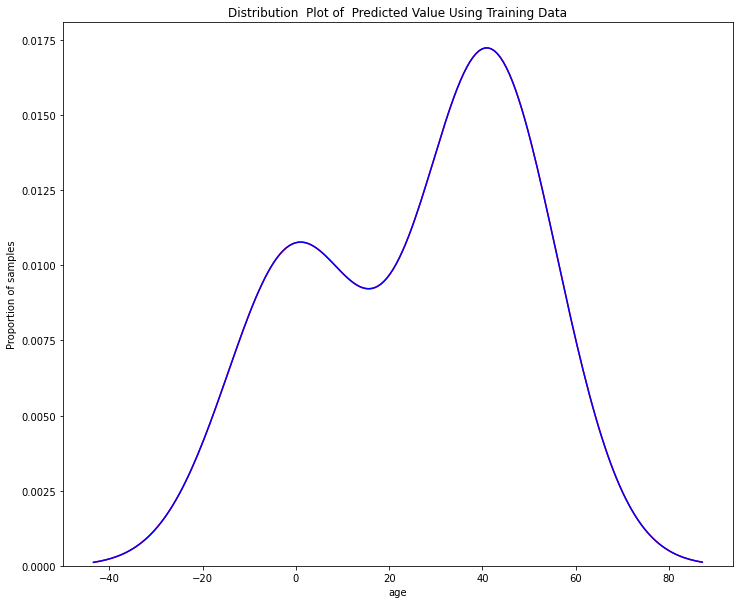

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


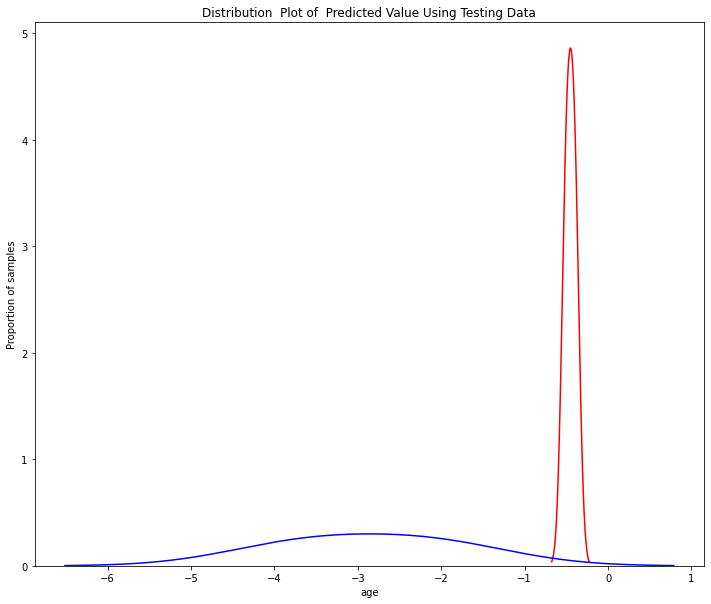

In [ ]:
lr = LinearRegression()
p = Prediction(x1,y_age,lr)
p.predict(x1,y_age)
p.score(x1,y_age)

Using grid search to find suitable alpha for ridge model to predict age of sample

In [ ]:
parameters= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
o = other_prediction(x1,y_age,parameters)
o.Ridge(x1,y_age)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
R^2 of data: -120.86222418253693
predict data: [[-1.2353075 ]
 [-0.53549276]]
actual testing data: [[-0.4986]
 [-0.4027]]


<h2>Part 4: The 2 most up and down regulated genes of 10 samples</h2>

#### <b>Data processing <b/>

In [ ]:
# The most up-regulated genes
up = up_down[up_down['log2FoldChange'] > 1]
up = up[up["padj"] == min(up["padj"])]
up = up.set_index("Unnamed: 0")
up.index.names = [None]
up

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,SRR1554534,SRR1554535,SRR1554568,SRR1554561,SRR1554567,SRR1554536,SRR1554541,SRR1554539,SRR1554538,SRR1554537
ST8SIA2,21470.98555,7.44298,0.2003,37.159148,3.119957e-302,4.823766e-298,8.614598,8.485263,14.645985,8.707785,14.756824,8.39641,15.159507,8.971893,14.917903,15.015816


In [ ]:
# The most down-regulated genes
down = up_down[up_down['log2FoldChange'] < -1]
down = down[down["padj"] == min(down["padj"])]
down = down.set_index("Unnamed: 0")
down.index.names = [None]
down

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,SRR1554534,SRR1554535,SRR1554568,SRR1554561,SRR1554567,SRR1554536,SRR1554541,SRR1554539,SRR1554538,SRR1554537
BCL2L2,21968.220153,-2.676407,0.088315,-30.305208,9.788276e-202,3.783413e-198,14.967316,14.943844,12.776112,15.151775,12.71442,14.999478,12.761278,15.053436,12.718466,12.793366


In [ ]:
up1 = up[["SRR1554534",	"SRR1554535",	"SRR1554568",	"SRR1554561",	"SRR1554567",	"SRR1554536",	"SRR1554541",	"SRR1554539",	"SRR1554538",	"SRR1554537"]]
up1_T = up1.T
up1_T

,ST8SIA2
SRR1554534,8.614598
SRR1554535,8.485263
SRR1554568,14.645985
SRR1554561,8.707785
SRR1554567,14.756824
SRR1554536,8.396410
SRR1554541,15.159507
SRR1554539,8.971893
SRR1554538,14.917903
SRR1554537,15.015816


In [ ]:
down1 = down[["SRR1554534",	"SRR1554535",	"SRR1554568",	"SRR1554561",	"SRR1554567",	"SRR1554536",	"SRR1554541",	"SRR1554539",	"SRR1554538",	"SRR1554537"]]
down1_T = down1.T
down1_T

,BCL2L2
SRR1554534,14.967316
SRR1554535,14.943844
SRR1554568,12.776112
SRR1554561,15.151775
SRR1554567,12.714420
SRR1554536,14.999478
SRR1554541,12.761278
SRR1554539,15.053436
SRR1554538,12.718466
SRR1554537,12.793366


In [ ]:
x2 = pd.concat([up1_T,down1_T],axis=1)
x2

,ST8SIA2,BCL2L2
SRR1554534,8.614598,14.967316
SRR1554535,8.485263,14.943844
SRR1554568,14.645985,12.776112
SRR1554561,8.707785,15.151775
SRR1554567,14.756824,12.714420
SRR1554536,8.396410,14.999478
SRR1554541,15.159507,12.761278
SRR1554539,8.971893,15.053436
SRR1554538,14.917903,12.718466
SRR1554537,15.015816,12.793366


#### <b>Logistic regression<b/>

Classifying by age_group

In [ ]:
lr = LogisticRegression()
p = Prediction(x2,y,lr)
p.predict(x2,y)
p.cnf(x2,y)

number of test samples : 2
number of training samples: 8
actual data:  [['0']
 ['0']]
predicted data:  ['0' '0']
confusion matrix: [[5 0]
 [0 5]]
Accuracy of 10 samples: 1.0
Precision of 10 samples: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classifying by gender

In [ ]:
# gender
p = Prediction(x2,y_gender,lr)
p.predict(x2,y_gender)
p.cnf(x2,y_gender)

number of test samples : 2
number of training samples: 8
actual data:  [['1']
 ['0']]
predicted data:  ['1' '1']
confusion matrix: [[0 4]
 [0 6]]
Accuracy of 10 samples: 0.6
Precision of 10 samples: 0.6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### <b>Predicting age (continuous data)<b/>

Multi linear regression

number of test samples : 2
number of training samples: 8
actual data:  [[-0.4986]
 [-0.4027]]
predicted data:  [[ 1.38679745]
 [-0.25893323]]
The R-square of testing data:  -776.5288225177012
The R-square of training data:  0.9934719800426677
The mean square error of actual and predicted fitting data is:  2.511263182559502


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


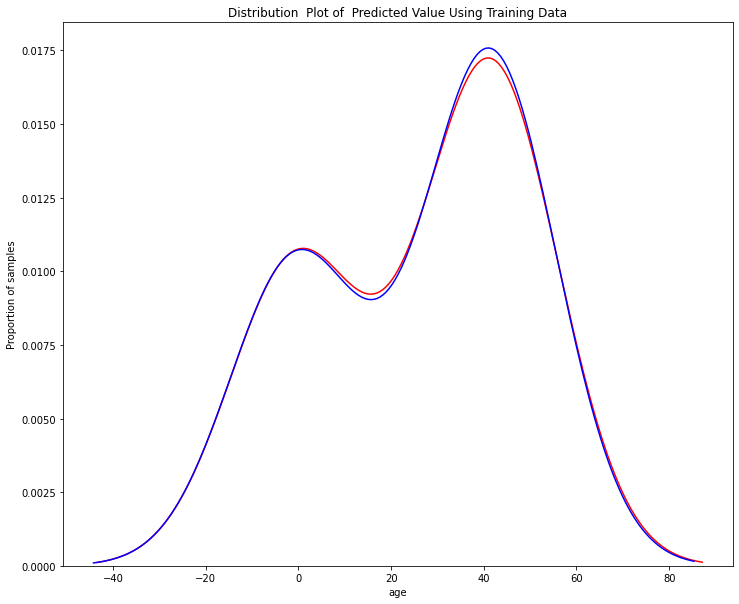

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


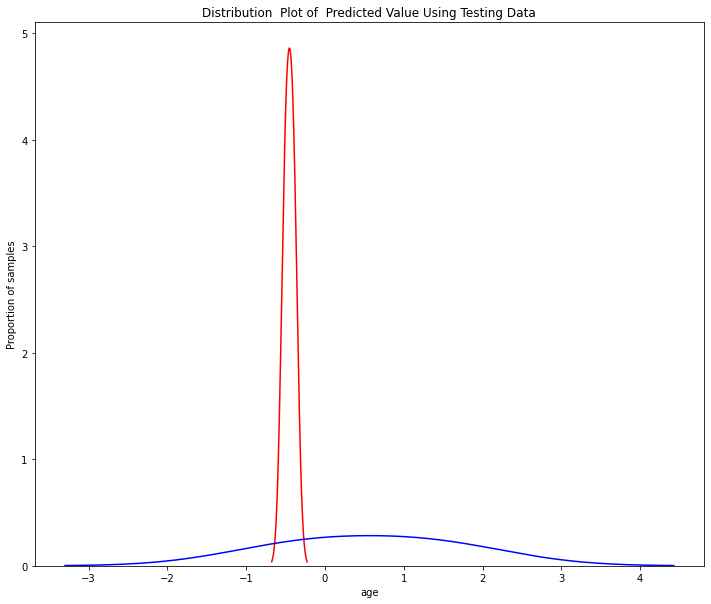

In [ ]:
lr = LinearRegression()
p = Prediction(x2,y_age,lr)
p.predict(x2,y_age)
p.score(x2,y_age)

Using grid search to find suitable alpha for ridge model

In [ ]:
parameters= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
order = [1, 2, 3, 4, 5, 6]
o = other_prediction(x2,y_age,parameters)
o.Ridge_Poly(x2,y_age,order)

Suitable degree for polynomial is:  5
Ridge(alpha=100000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
R^2 of test data using polynomial: -181.854129904386
R^2 of test data using Ridge: 0.06824799444715934
Predicted testing data using polynomial: [[-1.34953099]
 [-0.06100745]]
Predicted testing data using Ridge: [[-0.44613526]
 [-0.44184108]]
actual testing data:  [[-0.4986]
 [-0.4027]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.27657e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=3.78008e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=4.76069e-18): result may not be accurate.
  overwrite_a=False)


Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in 

number of test samples : 2
number of training samples: 8
actual data:  [[-0.4986]
 [-0.4027]]
predicted data:  [-0.3836 -0.3836]
The R-square of testing data:  -1.955331250727154
The R-square of training data:  0.9817607674268316
The mean square error of actual and predicted fitting data is:  6.018845462000002


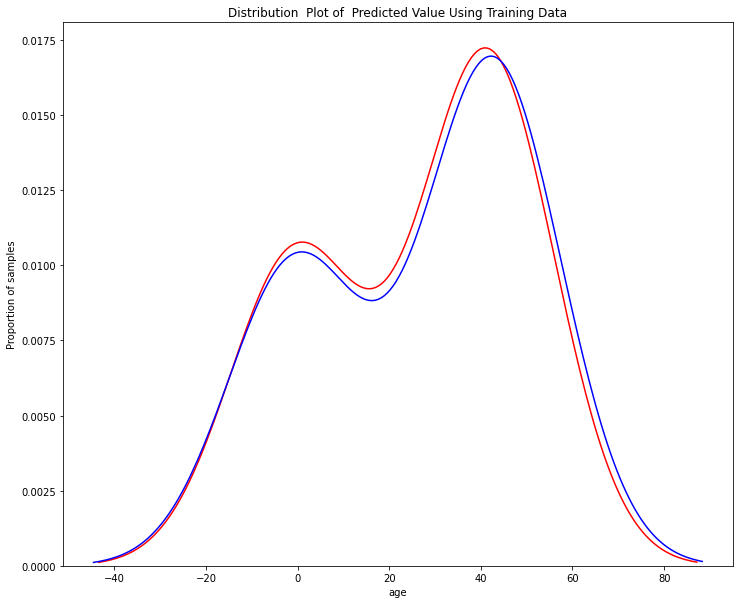

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


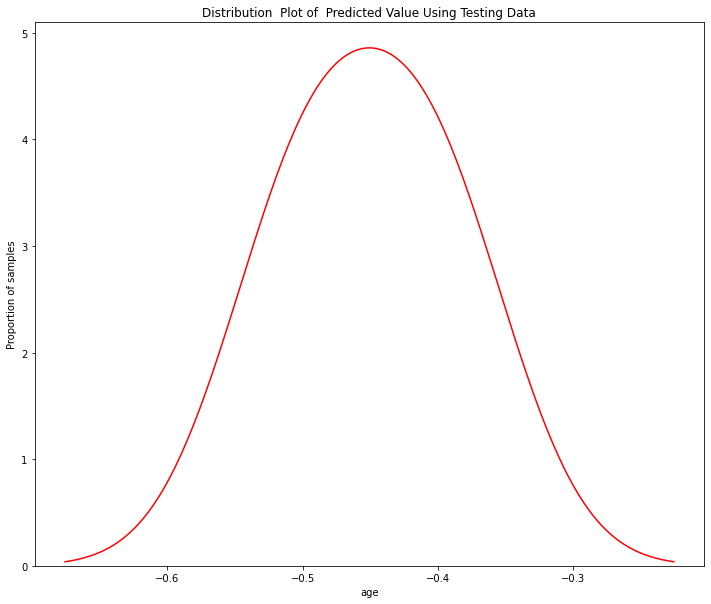

In [ ]:
lr = RandomForestRegressor(n_estimators=1)
p = Prediction(x2,y_age,lr)
p.predict(x2,y_age)
p.score(x2,y_age)

<h2>Part 5: Testing 4 new samples</h2>

**Testing**:
4 new samples.

In [ ]:
test = pd.read_csv("test_tr.csv")
test = test.set_index("Unnamed: 0")
test.index.names  = [None]
test_T = test.T
test_T

,A1BG,NAT2,ADA,CDH2,AKT3,GAGE12F,RNA5-8SN5,RNA18SN5,RNA28SN5,LINC02584,ZBTB11-AS1,MED6,NR2E3,NAALAD2,SNORD116-1,SNORD116-2,SNORD116-3,SNORD116-4,SNORD116-5,SNORD116-6,SNORD116-7,SNORD116-8,SNORD116-9,SNORD116-10,SNORD116-11,SNORD116-12,SNORD116-13,SNORD116-14,SNORD116-15,SNORD116-16,SNORD116-17,SNORD116-18,SNORD116-20,SNORD116-21,SNORD116-22,SNORD116-23,SNORD116-24,SNORD116-25,SNORD115-2,SNORD116-26,...,HS3ST4,HS3ST3B1,HS3ST3A1,HS3ST2,HS3ST1,USP15,CDC27,USP3,MVP,SLC23A2,SLC23A1,FGF19,TNFSF15,THRAP3,MED12,MED13,CDC34,NR1I3,NR1H4,NUP153,CCS,NR1D2,CLEC2B,RBX1,CDC42,DOP1B,FGFBP1,THOC1,REC8,RCE1,HNRNPDL,DMTF1,PPP4R1,CDH1,SLC12A6,PTBP3,KCNE2,DGCR2,CASP8AP2,SCO2
SRR1554555,9.842594,4.064995,10.194456,13.666168,12.536838,0.0,0.0,0.0,0.0,0.0,6.733536,10.900264,4.930287,10.601038,1.073101,0.550788,-1.717732,5.268730,-0.569865,1.979399,0.526164,0.037840,0.006389,-1.717219,1.555801,1.226760,0.854828,-0.360356,0.683252,0.0,-0.651268,1.773462,3.482150,4.393238,2.199730,0.381391,2.157940,0.349384,-0.216488,1.104895,...,11.317780,5.954522,4.398337,10.914249,9.975194,12.350830,12.607941,10.854976,12.426755,13.407082,5.592496,2.320384,2.243936,13.778983,12.295028,12.666754,12.937600,6.622925,2.966341,12.116494,12.361142,12.947952,10.519497,13.683268,14.110311,11.065400,0.0,12.179023,11.239283,10.545593,15.292278,13.394189,12.662962,8.916024,12.282734,11.456304,5.652751,13.703368,11.833747,4.498682
SRR1554554,9.116122,3.053218,8.701244,14.107108,14.617142,0.0,0.0,0.0,0.0,0.0,7.343270,11.010832,5.211614,11.001956,1.224705,0.546694,-1.710514,5.526210,-0.584557,1.755632,0.619503,0.095363,-0.003664,-1.729020,1.303822,1.484186,0.916480,-0.374881,0.613776,0.0,-0.666268,1.491955,3.617425,3.910441,2.458350,0.411616,2.518885,0.379650,-0.197065,1.227715,...,13.069341,6.326535,6.000274,12.174944,9.913463,12.722866,12.946037,10.513126,10.734787,14.539217,6.604880,2.540373,3.056680,13.972157,12.181259,13.877743,12.351068,7.849946,3.437979,12.662068,11.582788,13.757690,8.029790,12.358530,14.453363,11.884299,0.0,11.726511,11.374715,10.733168,15.003003,13.532467,12.760620,8.434184,13.326887,12.606110,6.057422,13.905900,12.041433,5.487258
SRR1554556,9.255977,3.133106,9.820673,13.665275,13.432602,0.0,0.0,0.0,0.0,0.0,7.427643,10.941614,5.238925,10.855666,1.107478,0.624305,-1.726364,5.604672,-0.518437,1.622905,0.522495,0.029285,0.186156,-1.707078,1.201947,1.335283,1.031284,-0.338083,0.729907,0.0,-0.633048,1.646448,3.454194,4.100124,2.303494,0.525159,2.623888,0.458998,-0.120107,1.313071,...,12.343558,5.402088,5.683820,11.700884,9.670613,12.350028,13.168329,10.063431,12.201417,14.499385,6.988996,2.240676,2.416687,13.922414,12.339940,13.496235,12.529929,7.666834,3.392837,12.545149,11.676418,13.571795,7.133612,12.725982,14.221620,12.064634,0.0,11.815687,11.225753,10.191163,15.374410,13.573755,12.550948,9.669908,13.146353,12.081561,6.271238,14.305266,11.834992,5.281921
SRR1554566,8.899507,3.140652,8.412066,14.802656,15.160773,0.0,0.0,0.0,0.0,0.0,7.500858,11.082138,4.651148,9.587597,1.263882,0.741255,-1.728542,6.150530,-0.557972,1.745093,0.691758,0.146717,-0.003792,-1.729909,1.201049,1.281650,0.940094,-0.291499,0.579027,0.0,-0.615278,1.614381,3.659014,4.253432,2.681687,0.438727,2.244646,0.435488,-0.229828,1.160296,...,13.210940,5.991869,5.460557,11.000215,9.533503,12.937937,13.299325,12.044507,9.819465,13.740801,7.214004,4.275445,2.376116,14.521857,13.257542,13.807675,12.771182,7.799877,3.797201,13.329387,11.905142,12.188332,6.481772,12.165349,13.969257,13.853422,0.0,12.675354,13.257625,11.026882,16.107816,14.015230,14.105969,10.200311,13.139234,12.671801,6.233273,14.179165,12.856061,4.749099


In [ ]:
test_sample = pd.read_csv("/content/test_sample.csv")
test_sample

,Run,age_group,age,sex
0,SRR1554555,adult,66.72,female
1,SRR1554554,fetus,0.30,female
2,SRR1554556,adult,36.98,male
3,SRR1554566,fetus,-0.50,male


In [ ]:
age = []
gender = []
for i in test_sample.age_group:
  if i == "adult":
    age.append("1")
  elif i == "fetus":
    age.append("0")
for i in test_sample.sex:
  if i == "male":
    gender.append("1")
  elif i == "female":
    gender.append("0")
fetus_adult = pd.Series(age, name='adult_fetus')
gender = pd.Series(gender, name='gender')
test_sample = pd.concat([test_sample,fetus_adult,gender], axis=1)
test_sample = test_sample.set_index("Run")
test_sample.index.names = [None]
test_sample

,age_group,age,sex,adult_fetus,gender
SRR1554555,adult,66.72,female,1,0
SRR1554554,fetus,0.30,female,0,0
SRR1554556,adult,36.98,male,1,1
SRR1554566,fetus,-0.50,male,0,1


Comparing new data with edata (15559 genes)

In [ ]:
t = test_T[test_T.columns & x.columns]
t

,A1BG,ADA,CDH2,AKT3,ZBTB11-AS1,MED6,NAALAD2,DDTL,NAALADL1,NINJ2-AS1,ACOT8,ABI1,GNPDA1,MIMT1,KCNE3,ZBTB33,SNHG8,GTF2IP4,CDH3,TANK,HAVCR1P1,POM121C,ZSCAN30,MCTS2P,SRA1,UCKL1-AS1,TMEM170B,SNORD58C,ZGLP1,FAM86JP,LOC100126784,C8orf88,PLCE1-AS1,FAM229A,JAZF1-AS1,LOC100128164,TMPO-AS1,LINC02731,ZNF667-AS1,LOC100128253,...,EXOG,XYLB,OXSR1,GFPT2,CRYZL1,WDR1,AMMECR1,CDC25C,GOLGA5,HS3ST4,HS3ST2,HS3ST1,USP15,CDC27,USP3,MVP,SLC23A2,SLC23A1,THRAP3,MED12,MED13,CDC34,NR1I3,NUP153,CCS,NR1D2,RBX1,CDC42,DOP1B,THOC1,REC8,RCE1,HNRNPDL,DMTF1,PPP4R1,CDH1,SLC12A6,PTBP3,DGCR2,CASP8AP2
SRR1554555,9.842594,10.194456,13.666168,12.536838,6.733536,10.900264,10.601038,8.398269,7.579428,9.476955,11.544520,13.838308,12.222630,7.692514,7.775407,11.919645,12.538180,9.504847,8.998413,12.295169,6.700672,10.888885,11.268434,8.375817,12.403796,4.664570,12.770395,6.864971,10.316611,5.723535,8.762773,7.960942,4.839333,9.046783,6.167236,6.489501,7.603687,9.370389,12.609586,3.821052,...,10.663356,7.929983,11.930842,11.364646,11.816526,13.879802,9.061733,4.350912,12.685440,11.317780,10.914249,9.975194,12.350830,12.607941,10.854976,12.426755,13.407082,5.592496,13.778983,12.295028,12.666754,12.937600,6.622925,12.116494,12.361142,12.947952,13.683268,14.110311,11.065400,12.179023,11.239283,10.545593,15.292278,13.394189,12.662962,8.916024,12.282734,11.456304,13.703368,11.833747
SRR1554554,9.116122,8.701244,14.107108,14.617142,7.343270,11.010832,11.001956,7.916075,6.766700,8.894385,11.175163,13.717305,12.124162,8.223674,8.891536,12.254962,12.053348,9.346973,10.375633,11.748542,6.075378,11.398187,11.998088,8.858840,11.571930,7.890595,13.505495,6.073504,10.362390,6.628746,10.789450,7.038796,5.011835,7.884393,4.773202,7.866094,6.861396,8.514510,12.119200,6.218408,...,10.488607,8.460683,12.323660,11.168983,11.467400,13.912173,10.007552,5.522136,11.837560,13.069341,12.174944,9.913463,12.722866,12.946037,10.513126,10.734787,14.539217,6.604880,13.972157,12.181259,13.877743,12.351068,7.849946,12.662068,11.582788,13.757690,12.358530,14.453363,11.884299,11.726511,11.374715,10.733168,15.003003,13.532467,12.760620,8.434184,13.326887,12.606110,13.905900,12.041433
SRR1554556,9.255977,9.820673,13.665275,13.432602,7.427643,10.941614,10.855666,7.836186,6.656777,8.791041,11.371151,13.367793,12.224151,6.626112,7.757456,12.033355,11.369339,9.432373,9.316464,11.613126,6.291112,11.499035,11.979956,8.552342,11.552309,6.764351,13.321178,6.174466,9.500030,7.233060,10.371695,6.752320,4.904566,7.453571,7.068232,7.009686,6.932598,9.067908,11.982571,7.206819,...,10.438603,8.230063,12.413572,10.923039,11.627106,13.754518,9.523991,5.120692,12.197088,12.343558,11.700884,9.670613,12.350028,13.168329,10.063431,12.201417,14.499385,6.988996,13.922414,12.339940,13.496235,12.529929,7.666834,12.545149,11.676418,13.571795,12.725982,14.221620,12.064634,11.815687,11.225753,10.191163,15.374410,13.573755,12.550948,9.669908,13.146353,12.081561,14.305266,11.834992
SRR1554566,8.899507,8.412066,14.802656,15.160773,7.500858,11.082138,9.587597,7.984262,7.062531,8.150352,10.782517,12.754587,12.214062,8.597903,8.365342,12.741526,11.580572,9.743906,10.327475,12.092445,6.919498,11.632948,12.426059,9.420199,12.106313,7.716994,13.214641,7.445297,10.793545,6.559706,9.070606,7.388544,6.510043,7.784559,3.921082,6.988975,8.617280,8.056505,11.554767,4.321846,...,11.298145,9.037356,13.443629,10.495218,11.414499,13.809582,10.459903,9.336402,12.371727,13.210940,11.000215,9.533503,12.937937,13.299325,12.044507,9.819465,13.740801,7.214004,14.521857,13.257542,13.807675,12.771182,7.799877,13.329387,11.905142,12.188332,12.165349,13.969257,13.853422,12.675354,13.257625,11.026882,16.107816,14.015230,14.105969,10.200311,13.139234,12.671801,14.179165,12.856061


In [ ]:
# Classify age_group based on logreg of edata
lr = LogisticRegression()
p = Prediction(x,y,lr)
p.test(t,test_sample[["adult_fetus"]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


actual data:  [['1']
 ['0']
 ['1']
 ['0']]
predicted data:  ['1' '1' '1' '0']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


confusion matrix: [[1 1]
 [0 2]]
Accuracy of 10 samples: 0.75
Precision of 10 samples: 0.6666666666666666


In [ ]:
# Classify gender based on logreg of edata
p = Prediction(x,y_gender,lr)
p.test(t,test_sample[["gender"]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


actual data:  [['0']
 ['0']
 ['1']
 ['1']]
predicted data:  ['0' '0' '1' '0']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


confusion matrix: [[2 0]
 [1 1]]
Accuracy of 10 samples: 0.75
Precision of 10 samples: 1.0


In [ ]:
# Predicting age based on multi linear regression of edata
lr = LinearRegression()
p = Prediction(x,y_age,lr)
p.test(t,test_sample[["age"]])

actual data:  [[66.72]
 [ 0.3 ]
 [36.98]
 [-0.5 ]]
predicted data:  [[43.69326411]
 [29.79544053]
 [38.61194465]
 [ 7.37365711]]
The R-square:  0.5336825378507974


In [ ]:
# Using grid search to find suitable alpha for ridge regression of edata
parameters= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
order = [1, 2, 3, 4, 5, 6]
o = other_prediction(x,y_age,parameters)
o.test(t,test_sample[["age"]],order)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
R^2 of data: 0.5267850462711139
predict data: [[43.81867049]
 [29.60267886]
 [38.80145286]
 [ 9.50505893]]
actual testing data: [[66.72]
 [ 0.3 ]
 [36.98]
 [-0.5 ]]


Comparing new data with up-down regulation data (5566 genes)

In [ ]:
t1 = test_T[test_T.columns & x1.columns]
t1

,ADA,CDH2,AKT3,ACOT8,ZBTB33,ZSCAN30,UCKL1-AS1,FAM86JP,LOC100126784,PLCE1-AS1,JAZF1-AS1,TMPO-AS1,LINC02731,LOC100128253,HTR5A-AS1,LOC100128288,LOC100128398,NDUFB9P2,ACVR2B-AS1,HPN-AS1,LINC01310,LOC100129203,GABPB1-AS1,ZNF730,FAM47E,MIR193BHG,CCDC152,ZNF737,LOC100129917,CERNA1,LOC100130238,LOC100130357,LOC100130370,TMEM221,VAC14-AS1,SNAP25-AS1,ZNF503-AS2,RAB6C-AS1,CADM3-AS1,FOXO6,...,ZNF518A,EPM2AIP1,C2CD2L,CEP350,CEP170,LRIG2,TRIL,TRIM66,SETDB1,TLK1,DDX46,ZBTB39,ZBED4,TECPR2,SV2B,KLHL21,SLC35E2A,CDC20,ARHGAP44,ARNT2,IQSEC1,ZBTB5,KIF14,CDC25A,PUM3,ARHGAP25,OXSR1,CDC25C,HS3ST2,USP15,USP3,MVP,SLC23A1,MED13,NR1D2,DOP1B,REC8,PPP4R1,PTBP3,CASP8AP2
SRR1554555,10.194456,13.666168,12.536838,11.544520,11.919645,11.268434,4.664570,5.723535,8.762773,4.839333,6.167236,7.603687,9.370389,3.821052,9.557936,9.839754,9.625471,7.054921,7.027131,9.656671,7.018078,7.346577,9.727393,4.085173,10.379950,6.882080,9.047428,10.161996,8.836539,7.843280,6.648591,7.459505,8.276722,9.603359,10.320688,7.489965,7.405446,8.226879,7.156624,7.182914,...,11.976143,13.061084,12.164360,13.005527,12.519232,9.947749,13.694490,10.469621,12.021752,13.156157,12.724716,10.054362,10.388637,12.971544,13.826410,12.312975,6.890500,8.466058,12.129494,14.579523,14.168803,10.860752,6.809018,6.514124,10.562555,8.976299,11.930842,4.350912,10.914249,12.350830,10.854976,12.426755,5.592496,12.666754,12.947952,11.065400,11.239283,12.662962,11.456304,11.833747
SRR1554554,8.701244,14.107108,14.617142,11.175163,12.254962,11.998088,7.890595,6.628746,10.789450,5.011835,4.773202,6.861396,8.514510,6.218408,10.284897,10.067581,10.634970,5.722728,6.616939,4.313540,5.506163,6.859159,10.222923,5.916493,9.156062,7.268289,8.661859,10.937415,9.992620,7.623853,7.334181,9.165605,6.955780,9.448146,9.152758,8.488265,7.041648,7.539102,8.112283,9.804497,...,12.823852,13.366406,13.165916,13.241775,13.486720,10.267560,12.309919,10.948625,11.866484,13.566069,13.074109,10.436389,11.788622,13.439108,15.246772,12.393370,9.134743,7.509118,13.736367,15.490895,15.172988,11.365579,7.591340,7.790382,10.239510,9.104176,12.323660,5.522136,12.174944,12.722866,10.513126,10.734787,6.604880,13.877743,13.757690,11.884299,11.374715,12.760620,12.606110,12.041433
SRR1554556,9.820673,13.665275,13.432602,11.371151,12.033355,11.979956,6.764351,7.233060,10.371695,4.904566,7.068232,6.932598,9.067908,7.206819,9.964260,9.731777,10.230987,6.379195,6.846589,9.663899,7.807447,7.232516,10.673599,5.727575,9.804792,7.296079,9.375290,11.090755,9.082454,7.777779,7.987559,8.881862,8.665695,8.987267,8.097745,8.080276,7.237092,7.990311,7.549684,8.416546,...,12.526122,13.507633,12.998673,13.266993,13.102038,10.504993,13.083886,11.310885,12.108972,13.364664,12.912625,10.477184,11.410548,13.902714,15.124505,12.853877,8.602660,8.263125,13.502367,15.680966,15.390176,11.435524,6.408240,7.384511,9.874459,9.315441,12.413572,5.120692,11.700884,12.350028,10.063431,12.201417,6.988996,13.496235,13.571795,12.064634,11.225753,12.550948,12.081561,11.834992
SRR1554566,8.412066,14.802656,15.160773,10.782517,12.741526,12.426059,7.716994,6.559706,9.070606,6.510043,3.921082,8.617280,8.056505,4.321846,6.143937,11.160799,10.972253,5.829725,8.222171,4.284316,6.627872,6.463724,12.113622,8.733505,7.738395,5.772313,9.995660,12.410925,10.117199,6.274791,6.496089,10.334094,5.929345,9.365229,6.118605,6.245251,6.716186,6.999986,8.289999,10.950213,...,13.219744,13.777316,12.283211,13.385305,14.683793,11.234516,12.500269,10.016483,13.197569,12.991971,13.840541,11.566362,13.286882,13.169502,10.895486,11.582686,9.772083,11.474735,12.656286,14.782510,14.094689,12.614449,10.655915,10.813492,11.423327,8.026339,13.443629,9.336402,11.000215,12.937937,12.044507,9.819465,7.214004,13.807675,12.188332,13.853422,13.257625,14.105969,12.671801,12.856061


In [ ]:
# Classify age_group based on logreg of up-down regulation
lr = LogisticRegression()
p = Prediction(x1,y,lr)
p.test(t1,test_sample[["adult_fetus"]])

actual data:  [['1']
 ['0']
 ['1']
 ['0']]
predicted data:  ['1' '1' '1' '1']
confusion matrix: [[0 2]
 [0 2]]
Accuracy of 10 samples: 0.5
Precision of 10 samples: 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Classify gender based on logreg of up-down regulation
p = Prediction(x1,y_gender,lr)
p.test(t1,test_sample[["gender"]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


actual data:  [['0']
 ['0']
 ['1']
 ['1']]
predicted data:  ['0' '0' '0' '0']
confusion matrix: [[2 0]
 [2 0]]
Accuracy of 10 samples: 0.5
Precision of 10 samples: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Predicting age based on multi linear regression of up-down regulation
lr = LinearRegression()
p = Prediction(x1,y_age,lr)
p.test(t1,test_sample[["age"]])

actual data:  [[66.72]
 [ 0.3 ]
 [36.98]
 [-0.5 ]]
predicted data:  [[21.34270589]
 [20.98302219]
 [21.0905975 ]
 [21.19976982]]
The R-square:  -0.02192780530905614


In [ ]:
# Using grid search to find suitable alpha for ridge regression of up-down regulation
parameters= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
order = [1, 2, 3, 4, 5, 6]
o = other_prediction(x1,y_age,parameters)
o.test(t1,test_sample[["age"]],order)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
R^2 of data: 0.010133942758390413
predict data: [[25.95405317]
 [25.76023224]
 [25.8097534 ]
 [25.47425108]]
actual testing data: [[66.72]
 [ 0.3 ]
 [36.98]
 [-0.5 ]]


Comparing new data with 2 most up and down regulated genes

In [ ]:
t2 = test_T[test_T.columns & x2.columns]
t2

,BCL2L2,ST8SIA2
SRR1554555,14.415983,6.973681
SRR1554554,14.542621,11.266891
SRR1554556,14.914283,8.690633
SRR1554566,13.051312,13.464992


In [ ]:
# Classify age_group based on logreg of 2 most up-down regulated genes
lr = LogisticRegression()
p = Prediction(x2,y,lr)
p.test(t2,test_sample[["adult_fetus"]])

actual data:  [['1']
 ['0']
 ['1']
 ['0']]
predicted data:  ['0' '0' '0' '0']
confusion matrix: [[2 0]
 [2 0]]
Accuracy of 10 samples: 0.5
Precision of 10 samples: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Classify gender based on logreg of 2 most up-down regulated genes
p = Prediction(x2,y_gender,lr)
p.test(t2,test_sample[["gender"]])

actual data:  [['0']
 ['0']
 ['1']
 ['1']]
predicted data:  ['1' '1' '1' '1']
confusion matrix: [[0 2]
 [0 2]]
Accuracy of 10 samples: 0.5
Precision of 10 samples: 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Predicting age based on multi linear regression of 2 most up-down regulated genes
lr = LinearRegression()
p = Prediction(x2,y_age,lr)
p.test(t2,test_sample[["age"]])

actual data:  [[66.72]
 [ 0.3 ]
 [36.98]
 [-0.5 ]]
predicted data:  [[-18.69533225]
 [ -3.60695282]
 [-15.02219667]
 [ 12.32575767]]
The R-square:  -2.240565797329176


In [ ]:
# Using polynomial feature and ridge regression,which is found suitable alpha by grid search, based on 2 most up-down regulated genes
parameters= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
order = [1, 2, 3, 4, 5, 6]
o = other_prediction(x2,y_age,parameters)
o.test(t2,test_sample[["age"]],order)

Suitable degree for polynomial is:  4
Ridge(alpha=100000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
R^2 of test data using polynomial: -155.38854609309558
R^2 of test data using Ridge: 0.7424542558579988
Predicted testing data using polynomial: [[-554.87602412]
 [ -19.26649581]
 [-285.36785958]
 [ -24.98544425]]
Predicted testing data using Ridge: [[40.18816614]
 [ 8.97209091]
 [33.44722129]
 [-4.67361376]]
actual testing data:  [[66.72]
 [ 0.3 ]
 [36.98]
 [-0.5 ]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.27657e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=3.78008e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=4.76069e-18): result may not be accurate.
  overwrite_a=False)


In [ ]:
# Predicting age based on random forest regression of 2 most up-down regulated genes
lr = RandomForestRegressor(n_estimators=100)
p = Prediction(x2,y_age,lr)
p.test(t2,test_sample[["age"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


actual data:  [[66.72]
 [ 0.3 ]
 [36.98]
 [-0.5 ]]
predicted data:  [1.079138 1.079138 1.082767 1.085441]
The R-square:  -0.8300661554863943
